# <center>Mathematical Foundations of Analytics 
## <center>CS660 – (CRN# 22921)
## <center>By: Prof. Thassos Sarbanes
## <center>Project #3 
<center>Ran Roffe <br>Nipun Ranchhod Navadia

### Let’s review how the CART (Classification And Regression Tree) algorithms work in
### Python’s scikit-learn module.
### Namely, we should study the following Decision Tree libraries:
### 1_ DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#### 2_ DecisionTreeRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#### 3_ RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#### 4_ RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
You should perform both Classification and Regression modeling on the following
#### datasets:
##### A_ For classification use scikit-learn’s hand-written digits (each data point is an 8X8 image
of a single digit)
 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
##### B_ For regression use scikit-learn’s California-housing dataset
https://scikit-
learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_ho
using

# Classification
##### * Perform Exploratory Data Analysis (EDA) on both datasets. 
##### * Perform classification task on the digit’s dataset, utilizing both DTClassifier and RandomForest with their default parameters. Which one performs better? Print out their respective Confusion Matrices.
##### * Perform same task as #1, but now tune the classifiers. Which one performs better? Print out their respective Confusion Matrices.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

c:\Users\ranro\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# loading the data
digits = load_digits()
X = digits.data       
y = labels = digits.target     
images = digits.images

## EDA

In [3]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features per sample: {X.shape[1]} (8x8 pixels)")
print(f"Unique labels: {np.unique(y)}")
print(f"Label distribution:\n{np.bincount(y)}")

Number of samples: 1797
Number of features per sample: 64 (8x8 pixels)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Label distribution:
[178 182 177 183 181 182 181 179 174 180]


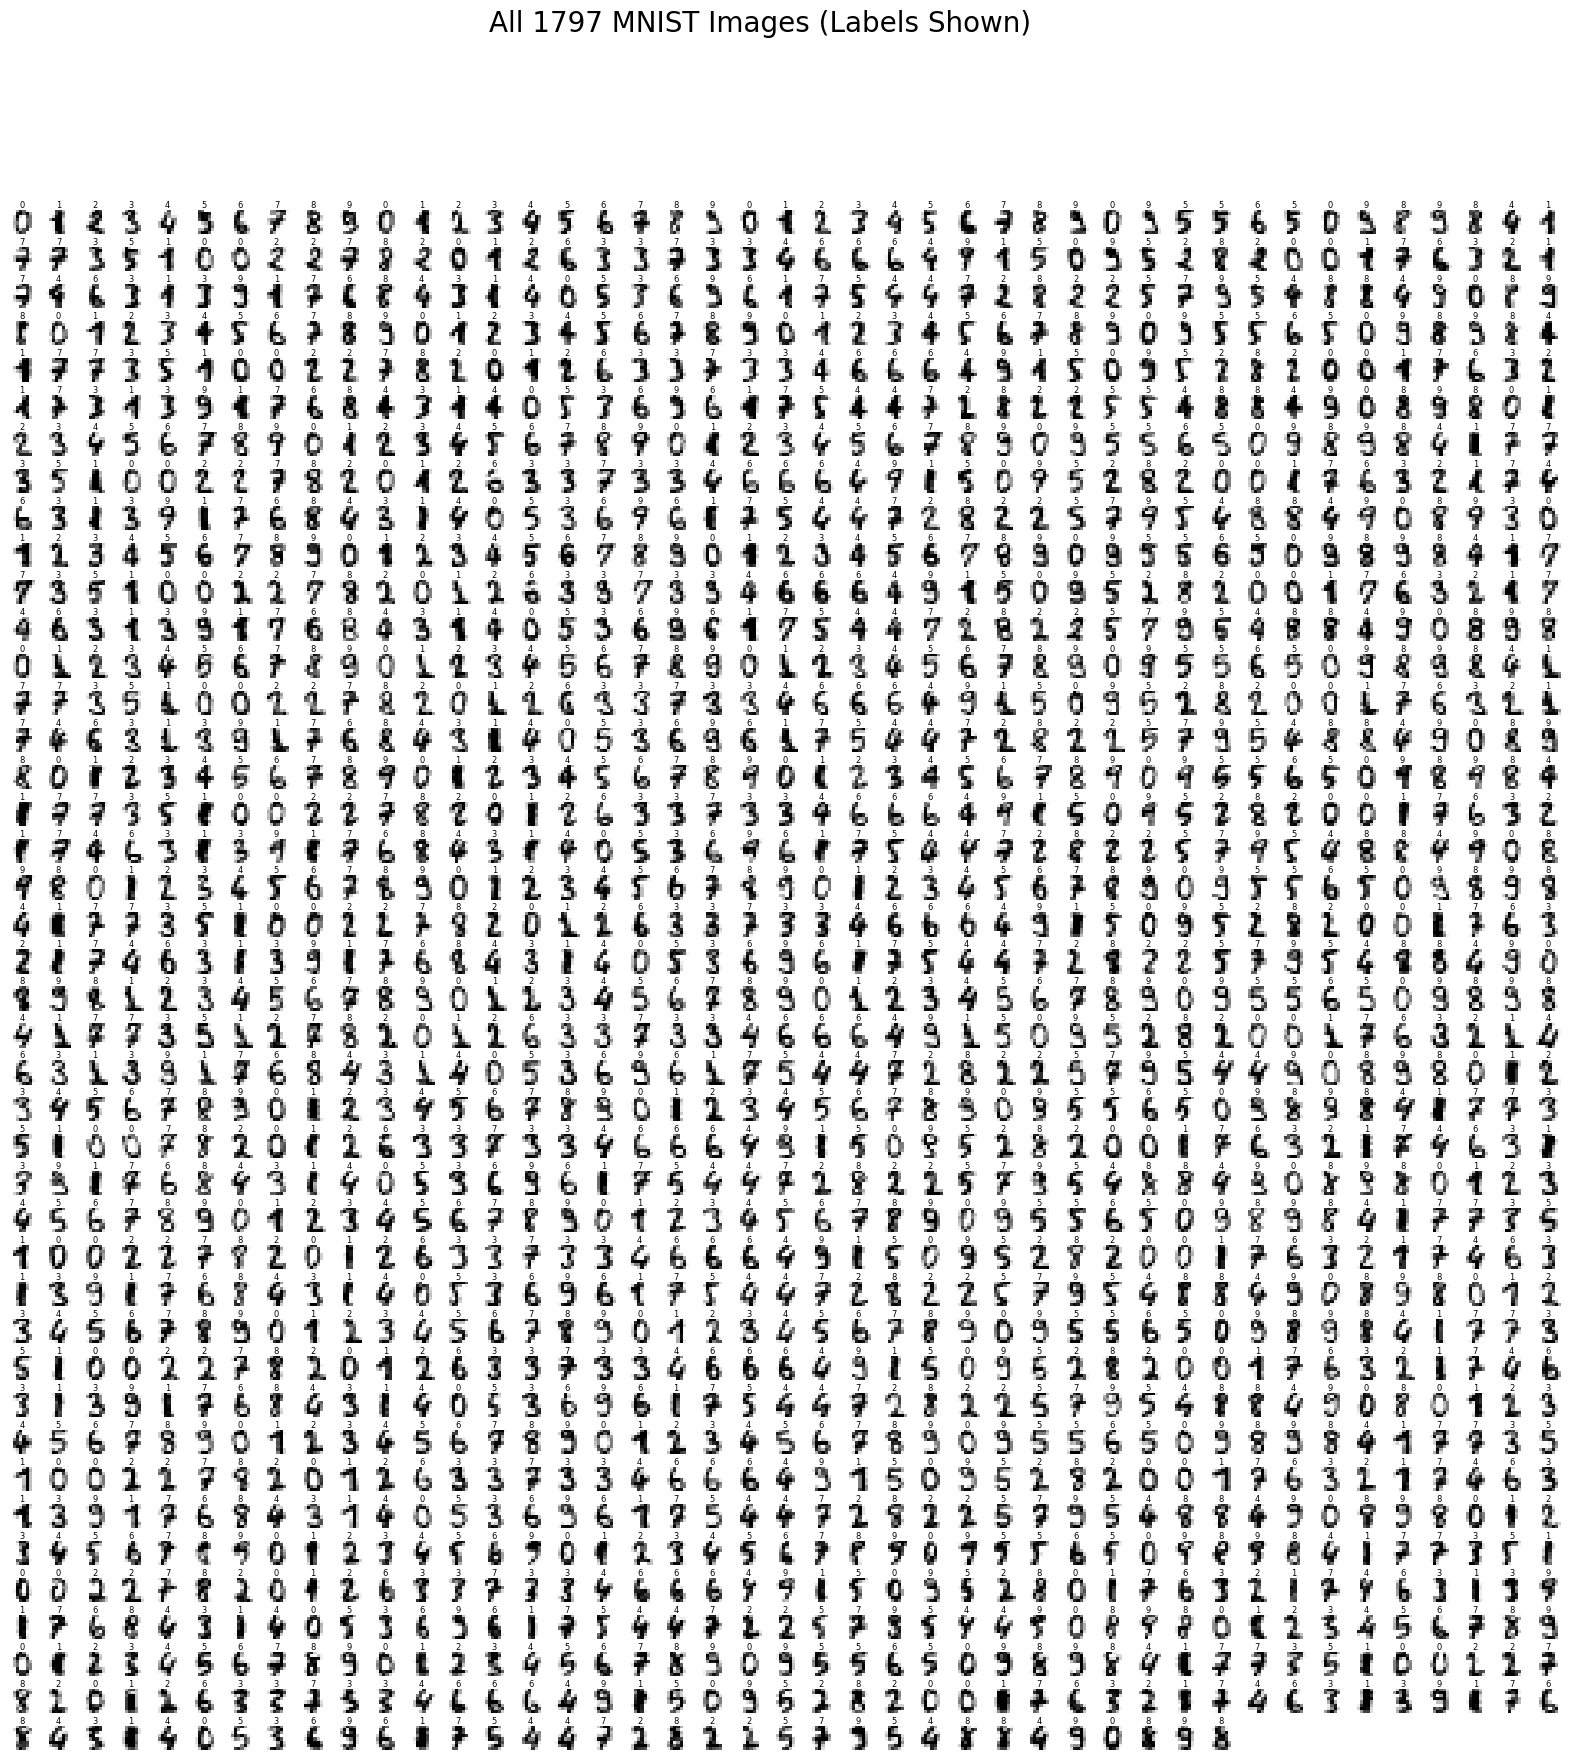

In [4]:
n_rows = int(len(images)**0.5)  
n_cols = n_rows + 1  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

axes = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes[i].imshow(image, cmap='binary', interpolation='nearest')
    axes[i].set_title(str(label), fontsize=6, pad=1)  # tiny font and padding
    axes[i].axis('off')

# hide unused subplots (if grid size > number of images)
for j in range(len(images), n_rows * n_cols):
    axes[j].axis('off')

plt.suptitle(f"All {len(images)} MNIST Images (Labels Shown)", fontsize=20)
plt.show()

## Classifier

### Standard Testing and Training data split for Default models wit 70:30 ratio.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training Decision Tree Classifier with default parameters

Accuracy: 84.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.73      0.74      0.73        50
           2       0.84      0.79      0.81        47
           3       0.78      0.83      0.80        54
           4       0.89      0.83      0.86        60
           5       0.90      0.83      0.87        66
           6       0.86      0.96      0.91        53
           7       0.84      0.85      0.85        55
           8       0.83      0.81      0.82        43
           9       0.82      0.83      0.82        59

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540


Confusion Matrix:


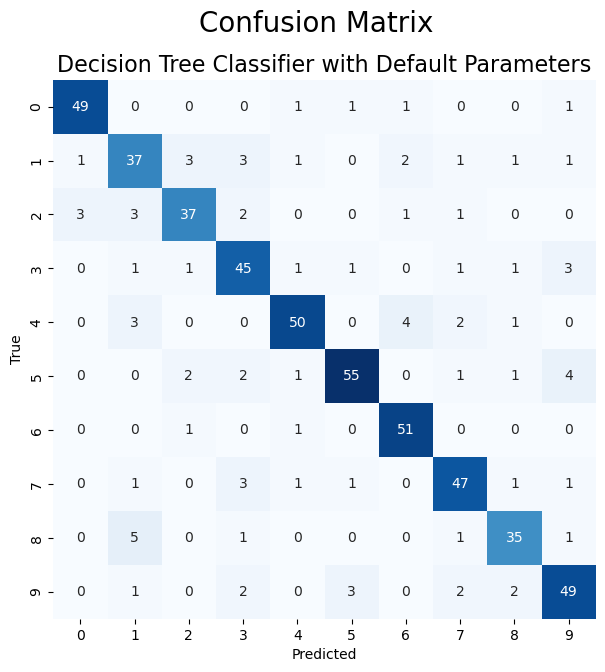

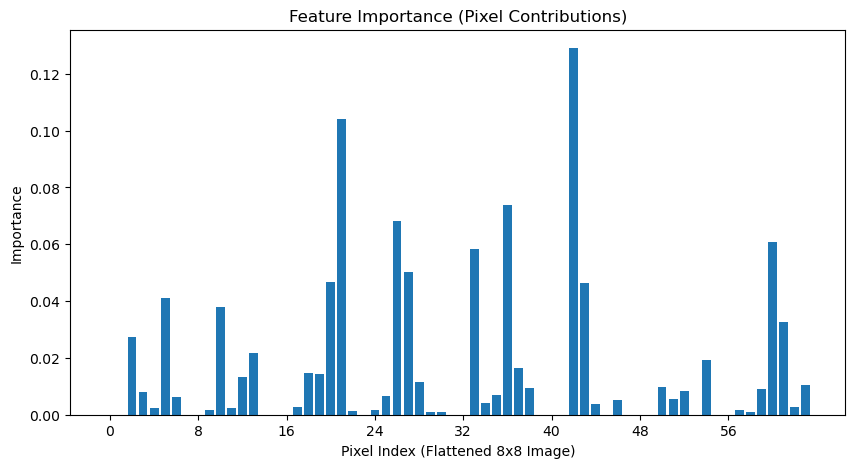

In [6]:
# init model & fit on training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# genrate confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Decision Tree Classifier with Default Parameters", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# plot pixel/feature importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

### Observations

### Training Random Forest Classifier with default parameters

Accuracy: 97.22%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       1.00      0.96      0.98        54
           4       0.97      1.00      0.98        60
           5       0.95      0.94      0.95        66
           6       0.98      0.98      0.98        53
           7       0.96      0.98      0.97        55
           8       0.93      0.95      0.94        43
           9       0.95      0.93      0.94        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540


Confusion Matrix:


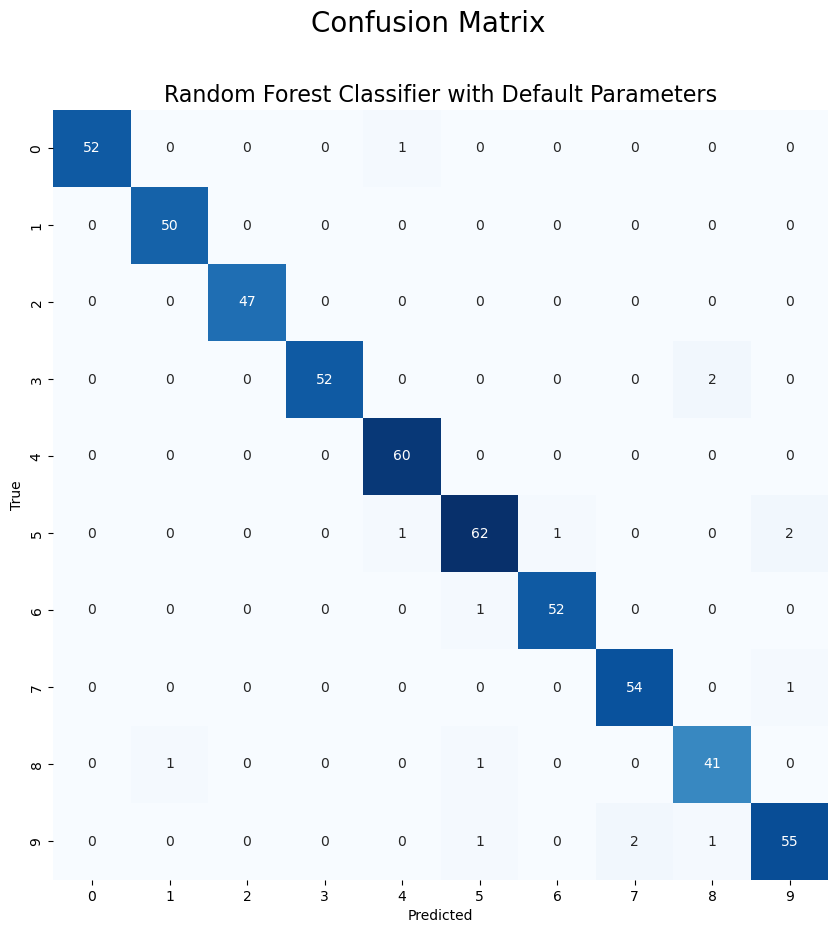

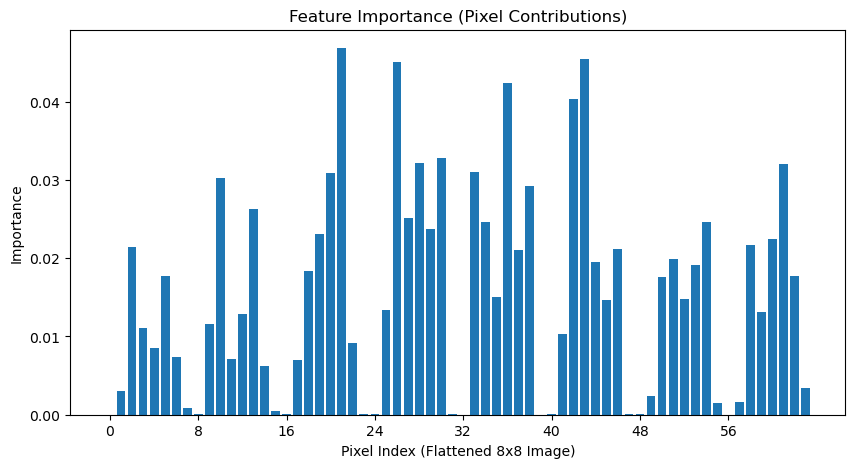

In [ ]:
# init model & fit on training data
clfrc = RandomForestClassifier()
clfrc.fit(X_train, y_train)

# predict on test data
y_pred = clfrc.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# generate confusion matrix
print("\nConfusion Matrix:")

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Random Forest Classifier with Default Parameters", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clfrc.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

### Observations

### Decision Tree with Grid Search

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy: 86.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.88      0.90      0.89        50
           2       0.78      0.81      0.79        47
           3       0.87      0.85      0.86        54
           4       0.79      0.83      0.81        60
           5       0.93      0.82      0.87        66
           6       0.91      0.96      0.94        53
           7       0.85      0.91      0.88        55
           8       0.78      0.84      0.81        43
           9       0.89      0.83      0.86        59

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540


Confusion Matrix:


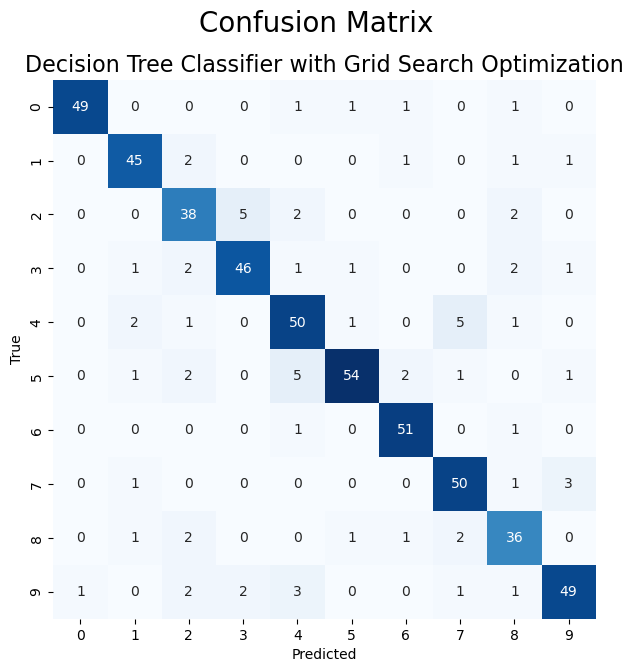

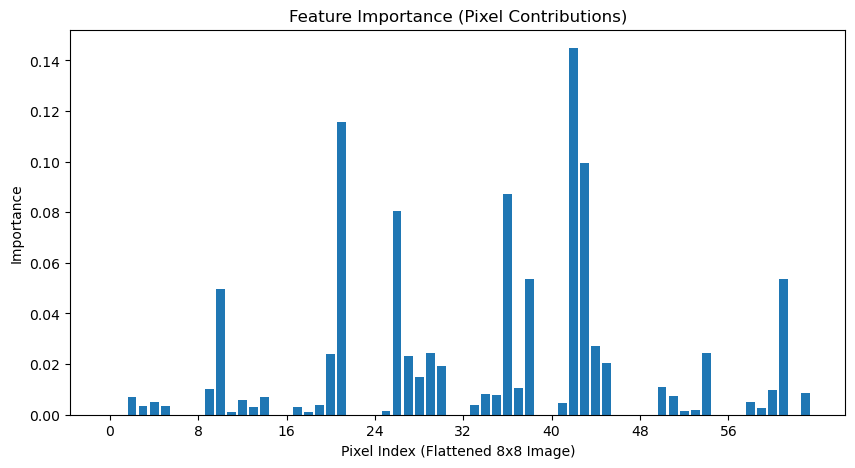

In [8]:
# init model
clf = DecisionTreeClassifier()

# define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model on the training data
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# create a new model with the best parameters
clf = DecisionTreeClassifier(**best_params)

# fit the "best" model on the training data
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# generate confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Decision Tree Classifier with Grid Search Optimization", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

### Observations:

### Random Forest with Grid Search

In [9]:
# init model
clf = RandomForestClassifier()

# define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1)

# fit the model
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# create a new model with the best parameters
clf = RandomForestClassifier(**best_params)

clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# generate confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Random Forest Classifier with Grid Search Optimization", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

KeyboardInterrupt: 

# Regression
##### * Perform Exploratory Data Analysis (EDA) on both datasets.
##### * Perform regression analysis task on the California-housing dataset, utilizing both DTRegressor and RandomRegressor with their default parameters. Which one performs better? Print out their respective Mean-Squared Error (MSE) and Coefficient of Determination (R-squared, R^2)
##### * Perform same task as #3, but now tune the regressors. Which one performs better? Print out their respective Mean-Squared Error (MSE) and Coefficient of Determination (R-squared, R^2)

### California Housing dataset
#### Data Set Characteristics:
* Number of Instances : 20640
* Number of Attributes : 8 numeric, predictive attributes and the target
* Attribute Information
* MedInc : median income in block group
* HouseAge : median house age in block group
* AveRooms : average number of rooms per household
* AveBedrms : average number of bedrooms per household
* Population : block group population
* AveOccup : average number of household members
* Latitude : block group latitude
* Longitude : block group longitude
* Target : The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).
* Missing Attribute Values : None


In [10]:
# loading the California housing dataset
housing = fetch_california_housing()

# checking the type of the dataset
print(type(housing))

# converting the dataset to a pandas DataFrame
df_features = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df_target = pd.DataFrame(data=housing.target, columns=['target'])
df = pd.concat([df_features, df_target], axis=1)


<class 'sklearn.utils._bunch.Bunch'>


## EDA

In [11]:
print(f'Data shape: {df.shape}')
df.head()

Data shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


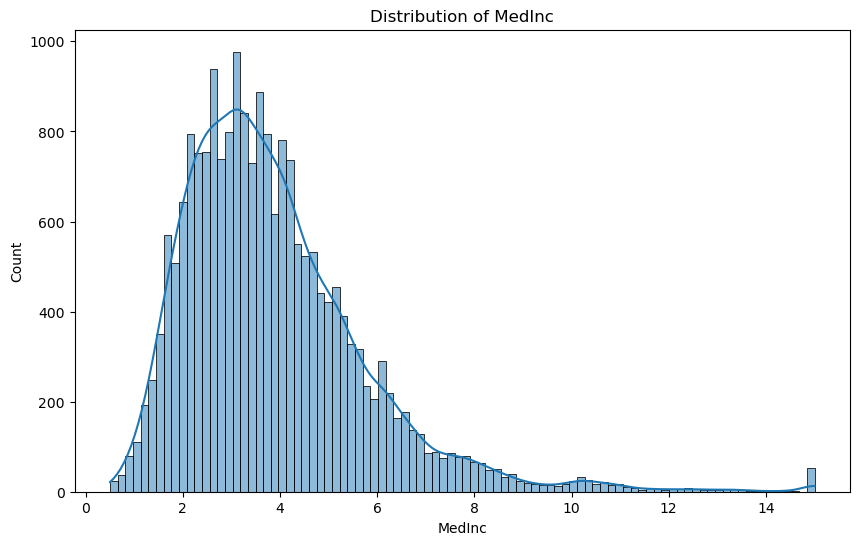

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


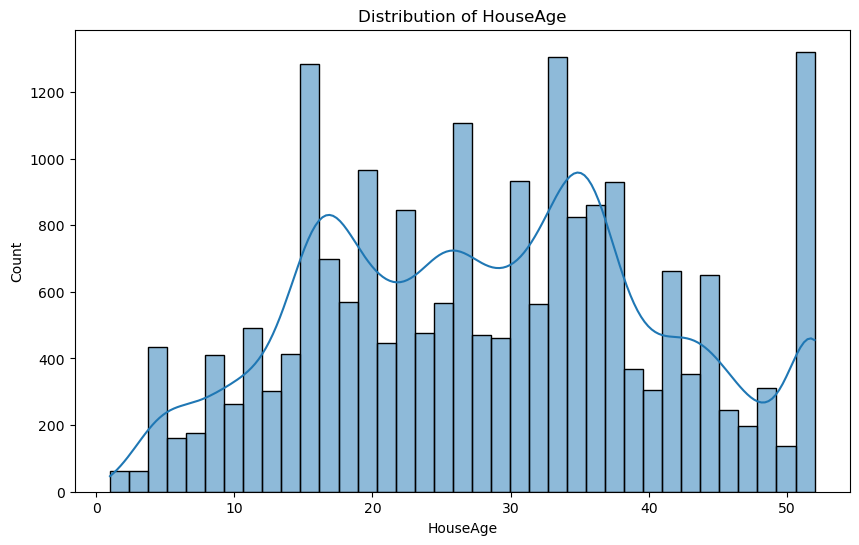

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


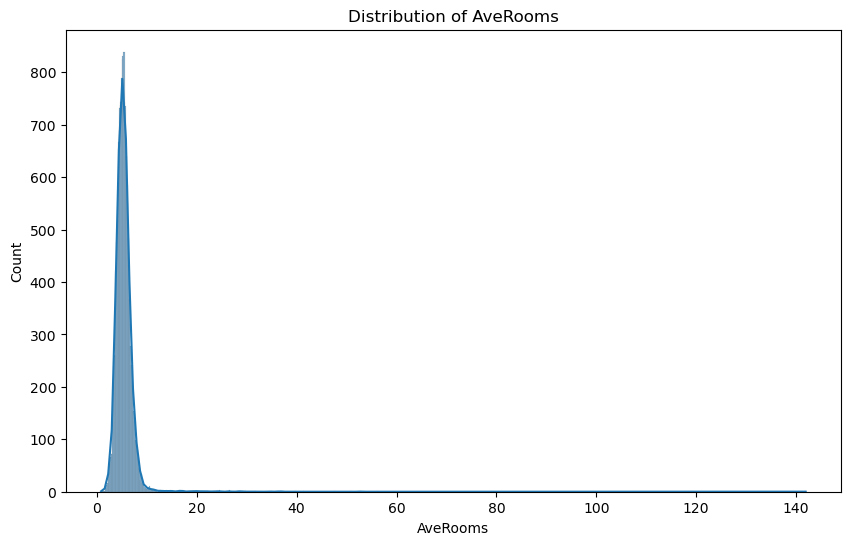

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


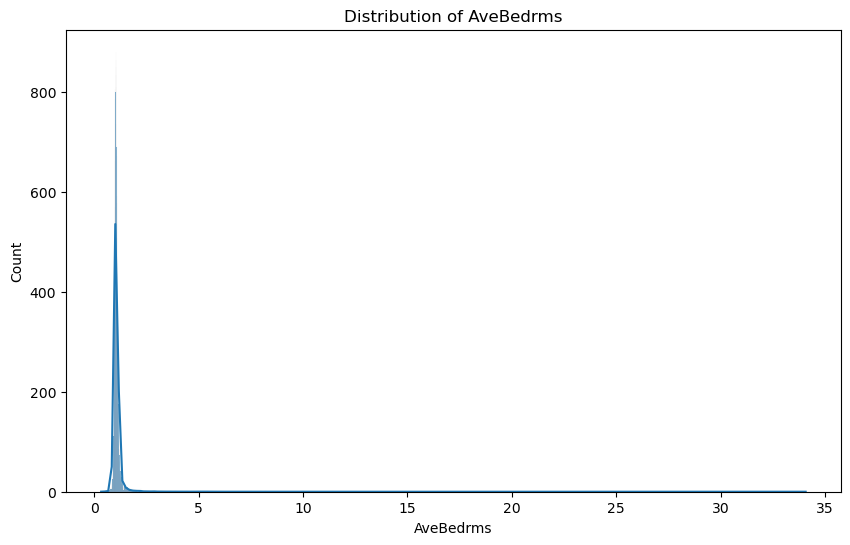

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


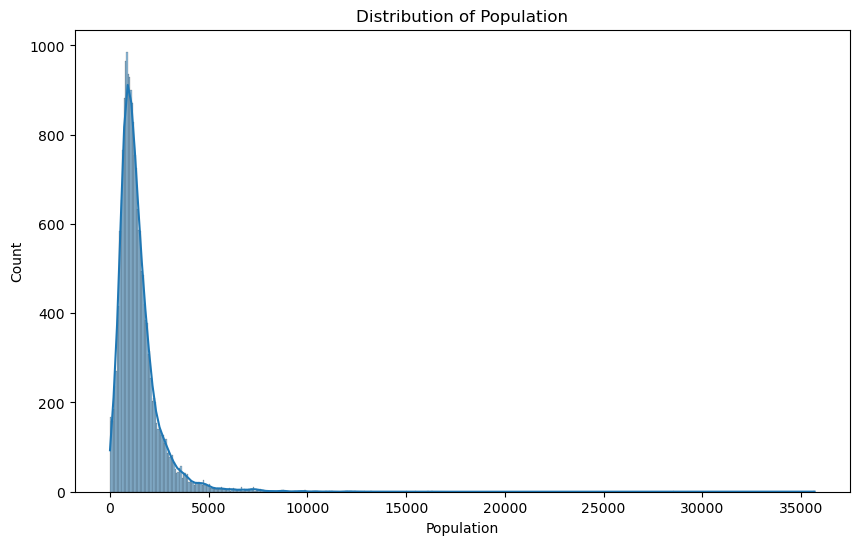

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


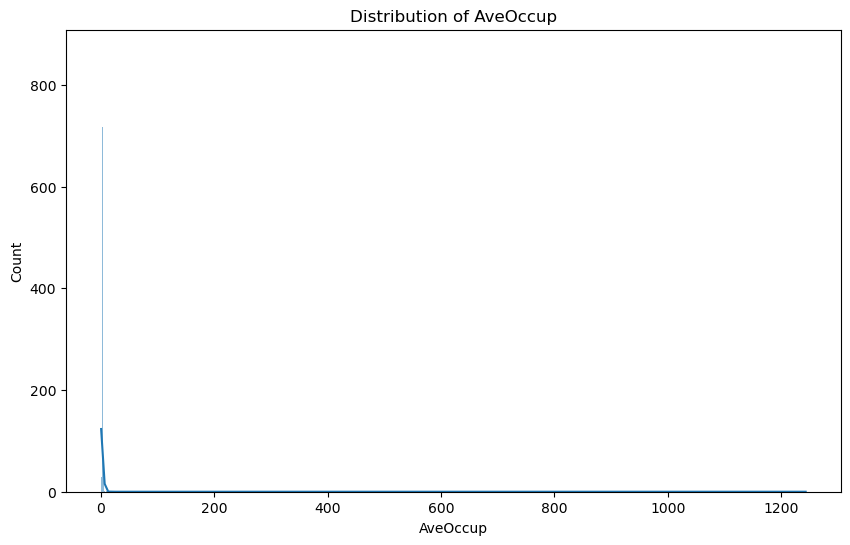

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


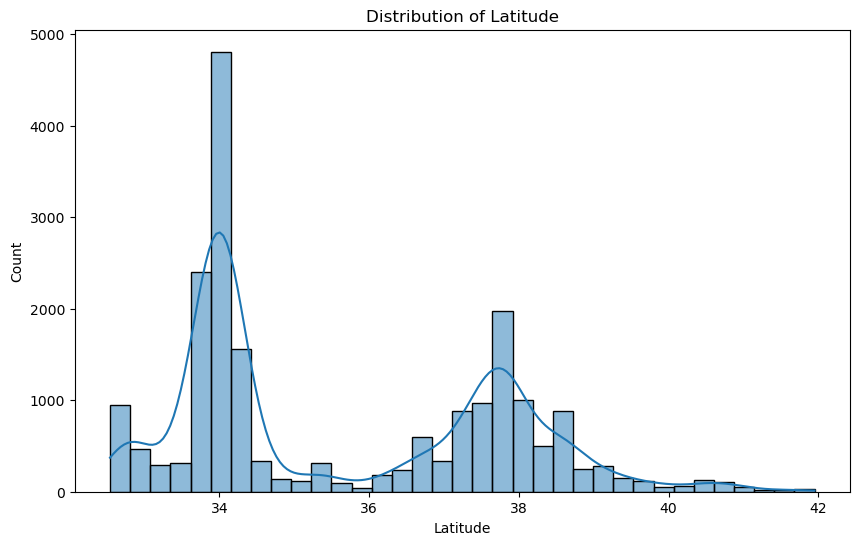

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


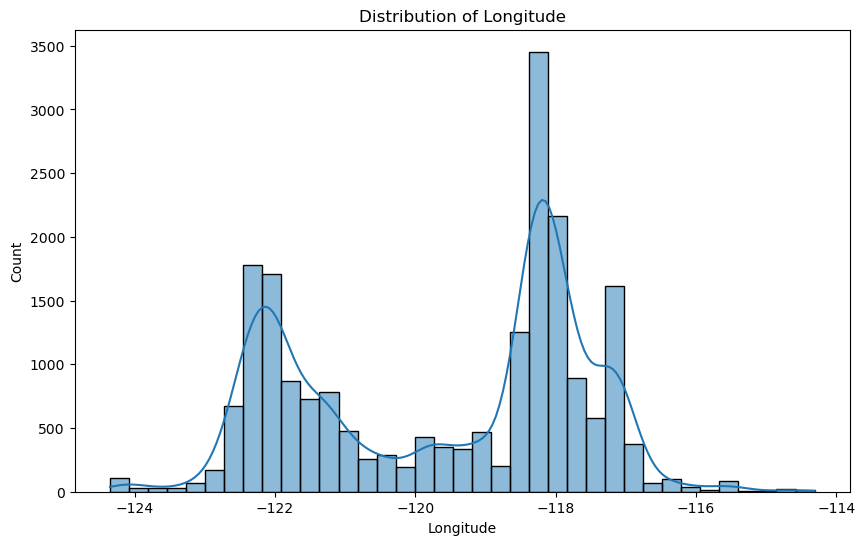

c:\Users\ranro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


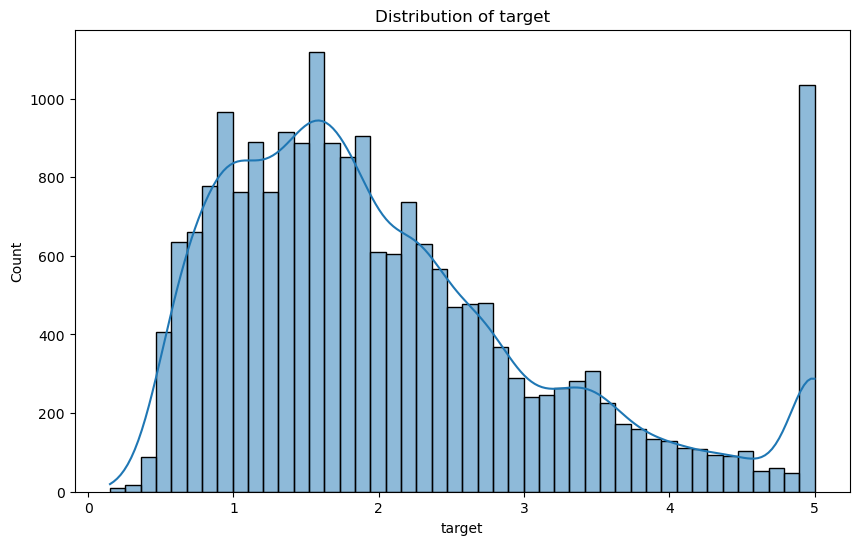

In [15]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

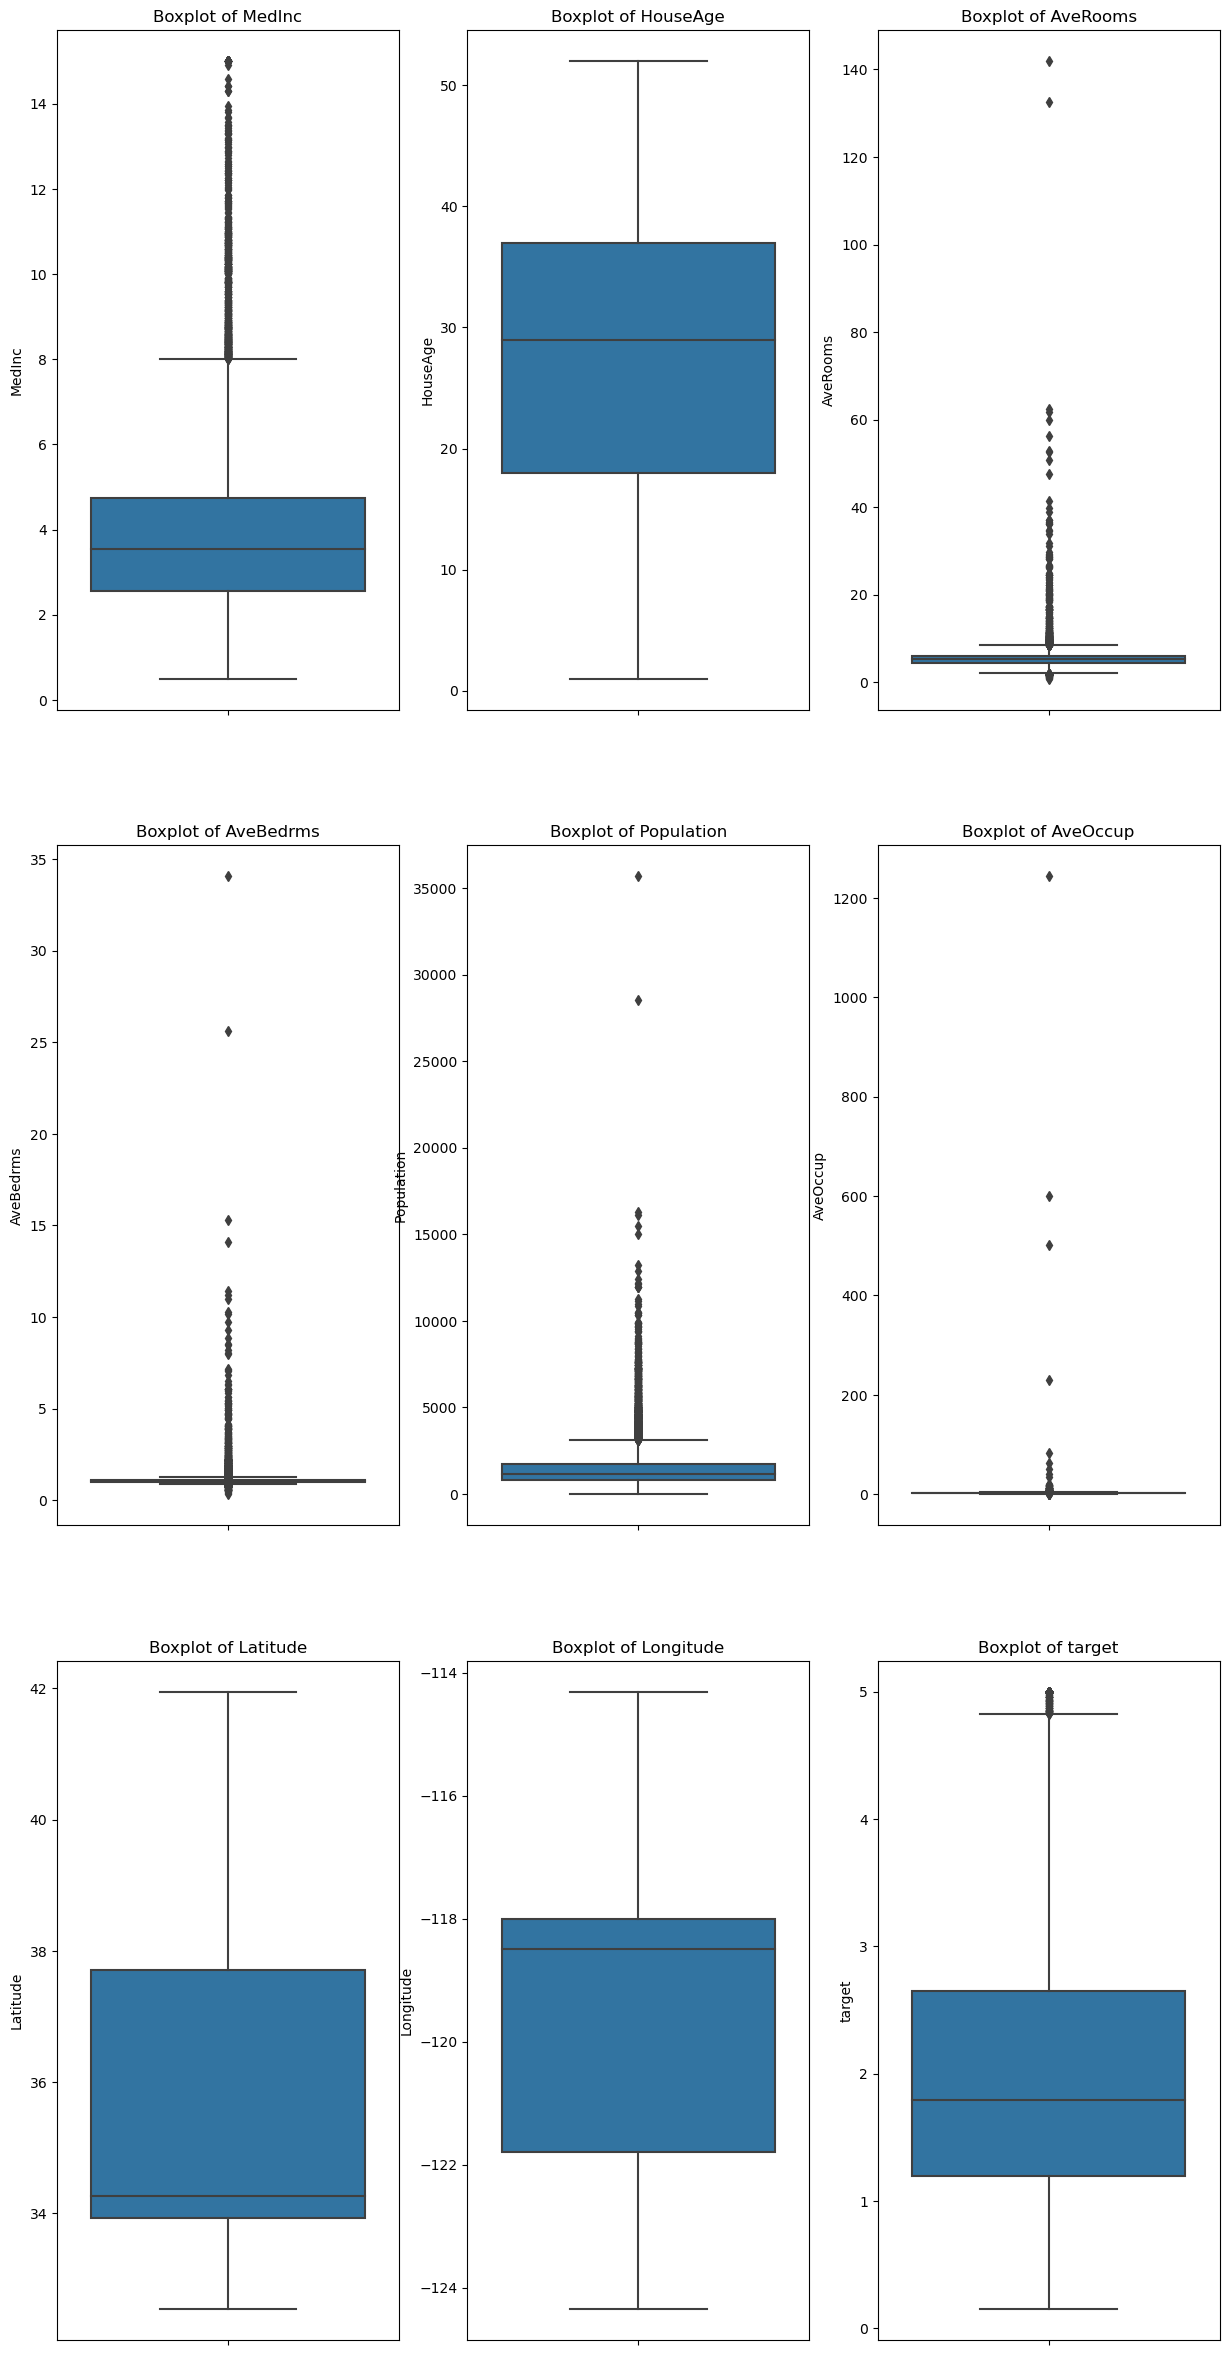

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 30))
axes = axes.flatten()  # Flatten for simple looping
# Plot boxplots
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
plt.show()

In [17]:
# # Check Z-Score for outliers
# def z_score_analysis(df, threshold=3):
#     z_scores = zscore(df)
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries = (abs_z_scores < threshold).all(axis=1)
#     outliers_df = df[~filtered_entries]
#     return outliers_df

# # Check outliers for different thresholds
# for threshold in [2, 2.5, 3]:
#     outliers_df = z_score_analysis(df, threshold)
#     num_of_outliers = outliers_df.shape[0]
#     print(f'Outliers for threshold {threshold}: {num_of_outliers}, {(num_of_outliers/len(df))*100:.2f}%')
#     print(f'outliers_df shape: {outliers_df.shape}')
#     print(f'df shape: {df.shape}\n')

# def detect_outliers_zscore(data: pd.DataFrame, threshold: int = 3):
    
#     """Detects outliers in a dataset using Z-score statistical method.
    
#     The Z-score measures how many standard deviations a data point is from the mean.
#     This method assumes the data follows a normal distribution.
    
#     Parameters
#     ----------
#     data : DataFrame
#     threshold : The number of standard deviations from the mean to consider as outlier threshold, by default 3.
        
#     Returns
#     -------
#     array
#         Array of outliers found in the input data. """
    
#     z_scores = np.abs(stats.zscore(data))
#     outliers = data[z_scores > threshold]
#     return outliers

# threshold = 3 # convention for z-score outliers

# print("\n      Outliers Before Handling")

# for col in df.columns:
#     outliers = detect_outliers_zscore(df[col], threshold)  # calcualte z-score to get the outliers values
#     num_outliers = len(outliers)
#     outlier_percentage = (num_outliers / len(df[col])) * 100    # portion of outliers
#     print(f"{col}\t:\t{num_outliers} outliers ({outlier_percentage:.2f}%)")

# # Replace outliers with the mean of the column
# for col in df.columns:
#     outliers = detect_outliers_zscore(df[col], threshold)
#     if not outliers.empty:
#         df.loc[outliers.index, col] = df[col].mean()

# print("\n      Outliers After Handling")
# for col in df.columns:
#     outliers = detect_outliers_zscore(df[col], threshold)    # portion of outliers
#     num_outliers = len(outliers)
#     outlier_percentage = (num_outliers / len(df[col])) * 100
#     print(f"{col}\t:\t{num_outliers} outliers ({outlier_percentage:.2f}%)")

In [18]:
HVN = pd.DataFrame()
HVN['MHP'] = 'Price = ' + df['target'].astype(str)
HVN['Longitude'] = df['Longitude']
HVN['Latitude'] = df['Latitude']

# Create the scatter mapbox plot
fig = px.scatter_mapbox(HVN, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="MHP", 
                        mapbox_style="open-street-map", 
                        zoom=5)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}, title_text="Distribution of Houses in California", title_x=0.5)
fig.show()


Text(0.5, 1.0, 'Correlation Matrix')

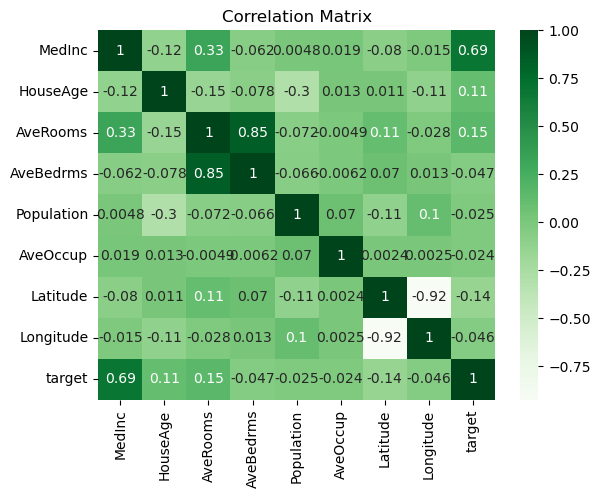

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='Greens').set_title('Correlation Matrix')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 3.0944444444444446
R² Score: 0.6128299788381038


In [22]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.3615962962962962
R² Score: 0.829640093297703


Best parameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error: 2.534619341563786
R² Score: 0.6828740532497155


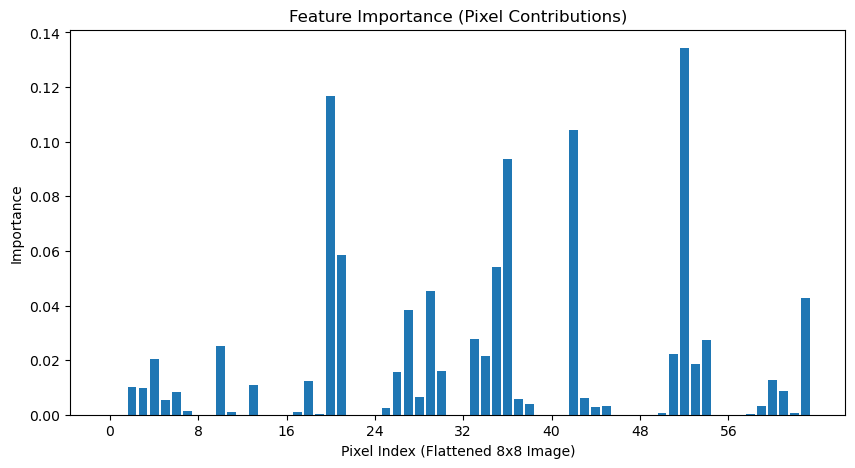

In [23]:
clf = DecisionTreeRegressor()
# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the model
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Create a new DecisionTreeClassifier with the best parameters
clf = DecisionTreeRegressor(**best_params)
# Fit the model

clf.fit(X_train, y_train)
# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


# Plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

In [ ]:
# Regression with Random Forest regressor using GridSearchCV
regressor = RandomForestRegressor()
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10, 30],
    'min_samples_split': [2, 5, 10],
}
# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the model
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
# Create a new DecisionTreeClassifier with the best parameters
regressor = RandomForestRegressor(**best_params)
# Fit the model
regressor.fit(X_train, y_train)
# Predict on test data
y_pred = regressor.predict(X_test)
# Calculate accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)
# Plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), regressor.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()
# Regression with Random Forest regressor using RandomizedSearchCV